<a href="https://colab.research.google.com/github/HenriPett/Data-Airbnb/blob/main/data_Airbnb_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_nyc = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/eds_outliers/master/nyc.csv', index_col=0)

df_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


In [3]:
print('Dataset dimensions',
      '\nvariables: ', df_nyc.shape[1], '\n'
      'entries: ', df_nyc.shape[0])

Dataset dimensions 
variables:  16 
entries:  49530


In [6]:
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
(df_nyc.isnull().sum()).sort_values(ascending=False)

last_review                       11319
reviews_per_month                 11319
name                                 18
host_name                             6
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df_nyc.drop(columns=['reviews_per_month', 'last_review'], inplace=True)

In [11]:
df_nyc.dropna(axis=0, inplace=True)

In [13]:
(df_nyc.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# IQR = Q3 - Q1
## Q1 = 25%
## Q3 = 75%

In [15]:
df_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.950600e+04,4.950600e+04,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000
mean,2.296530e+07,8.511890e+07,40.729232,-73.951041,162.656648,8.174040,23.877954,6.235466,126.695390
std,1.352568e+07,9.889048e+07,0.054673,0.047553,419.408789,21.522983,48.255027,25.491224,142.381721
min,2.060000e+03,2.259000e+03,40.499790,-74.240840,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.087581e+07,9.268318e+06,40.689810,-73.983360,68.000000,2.000000,1.000000,1.000000,0.000000
50%,2.233894e+07,3.801608e+07,40.723840,-73.955355,101.000000,3.000000,5.000000,1.000000,79.000000
75%,3.557870e+07,1.373589e+08,40.762790,-73.934290,175.000000,6.000000,23.000000,2.000000,267.000000
max,4.370336e+07,3.490826e+08,40.911690,-73.712990,10000.000000,1250.000000,746.000000,280.000000,365.000000


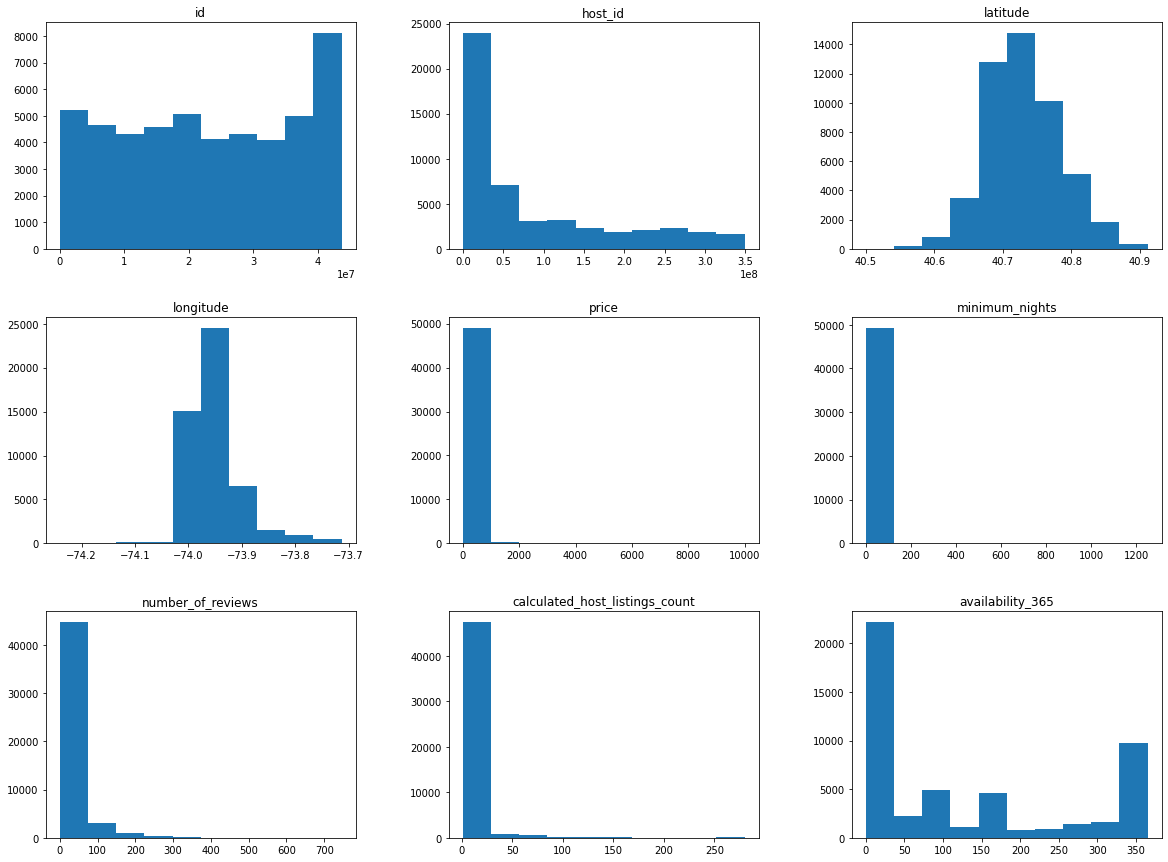

In [18]:
df_nyc.hist(figsize=(20, 15), grid=False);

In [22]:
q1_price = df_nyc.price.quantile(.25)
q3_price = df_nyc.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('High ', sup_price)
print('Low ', inf_price)

IQR:  107.0
High  335.5
Low  -92.5


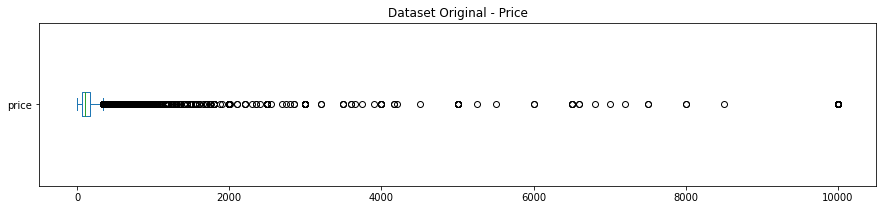

N Columns:  49506
Entries under 335.5:  2913


In [27]:
fig, ax = plt.subplots(figsize=(15, 3))
df_nyc.price.plot(kind='box', vert=False)
ax.set_title('Dataset Original - Price')
plt.show()

print('N Columns: ', df_nyc.shape[0])
print('Entries under 335.5: ', len(df_nyc[df_nyc.price > 335.5]))